<a href="https://colab.research.google.com/github/Abishekok/ML_Sales_Forcasting/blob/main/Sales_Forcast_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem approch
- Business requirement and nature of available data.
- Problem calssification supervised/unsupervised, regression/classifiaction
- Exploring dataset and creation new features.
- Create training/test/validation sets.
-Pick model to train/test the prediction
- Validate prediction using RMSE
-Present findings.

In [178]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px


In [179]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset_for_ML_project/Sales_data set/Rossmon_sales_dataset/train.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Dataset_for_ML_project/Sales_data set/Rossmon_sales_dataset/store.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset_for_ML_project/Sales_data set/Rossmon_sales_dataset/test.csv')

<ipython-input-179-64416a6eeb39>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Dataset_for_ML_project/Sales_data set/Rossmon_sales_dataset/train.csv')


In [180]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [181]:
store_df.shape

(1115, 10)

In [182]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [183]:
df = train_df.merge(store_df, how = 'left', on = 'Store')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [184]:
merged_test_df = test_df.merge(store_df, how = 'left', on = 'Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [186]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [187]:
df['Date'] = pd.to_datetime(df.Date)

In [188]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [189]:
df.Date.min(), df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [190]:
merged_test_df.Date.min(),merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

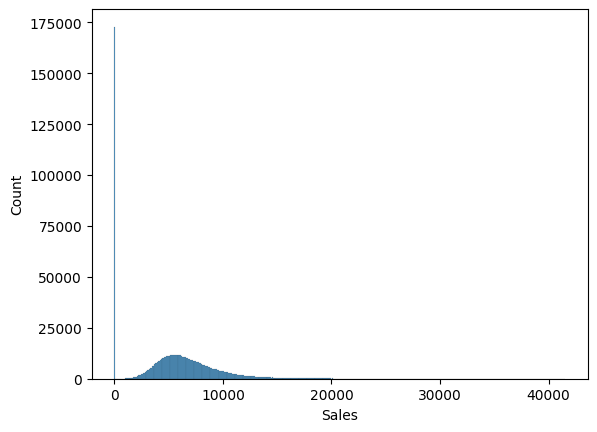

In [191]:
#EDA
sns.histplot(data = df, x = 'Sales')

In [192]:
df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [193]:
df = df[df.Open==1].copy()

In [194]:
df.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

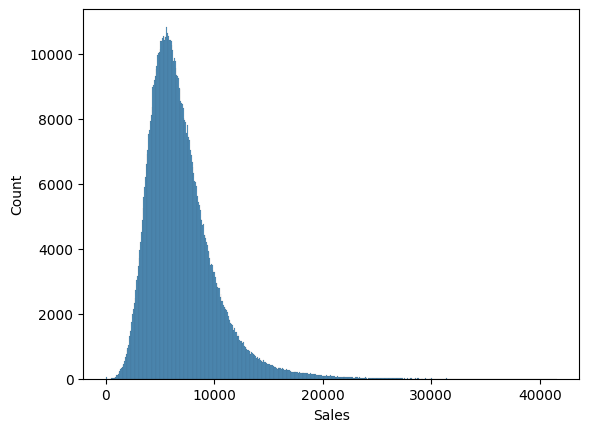

In [195]:
sns.histplot(data = df, x = 'Sales')

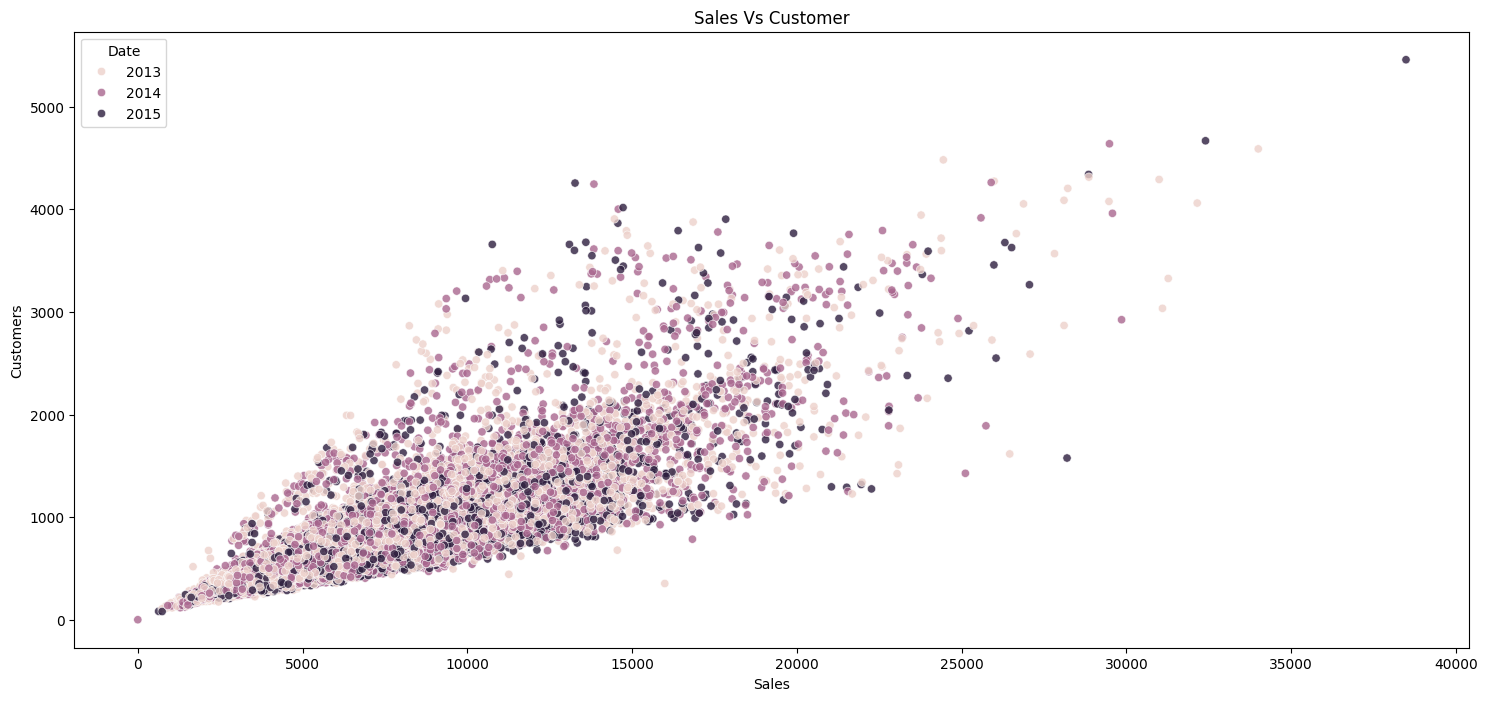

In [196]:
plt.figure(figsize = (18,8))
temp_df = df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title('Sales Vs Customer')
plt.show()

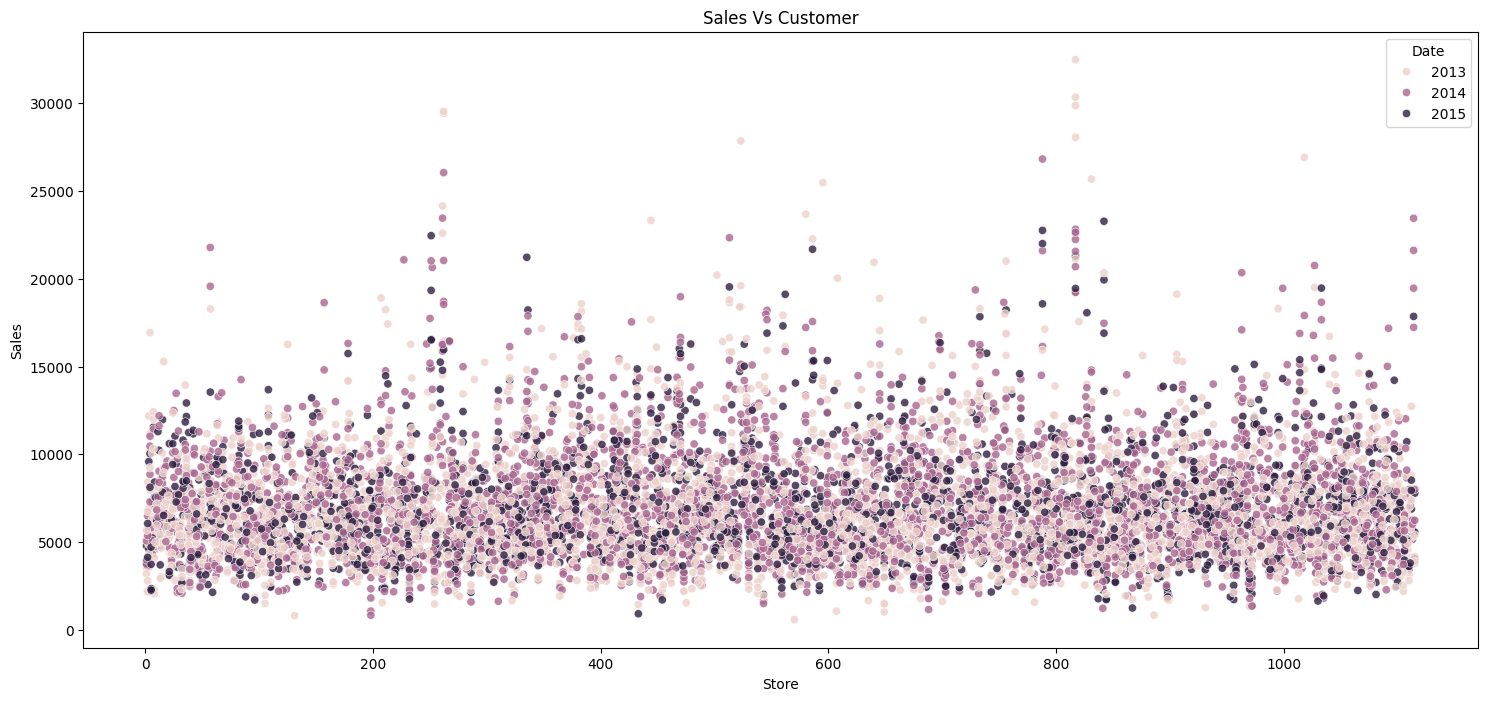

In [197]:
plt.figure(figsize = (18,8))
temp_df = df.sample(10000)
sns.scatterplot(x=temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title('Sales Vs Customer')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

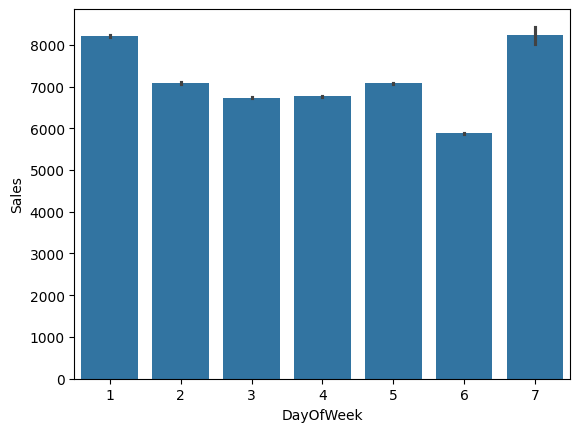

In [198]:
sns.barplot(data = df, x = 'DayOfWeek', y = 'Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

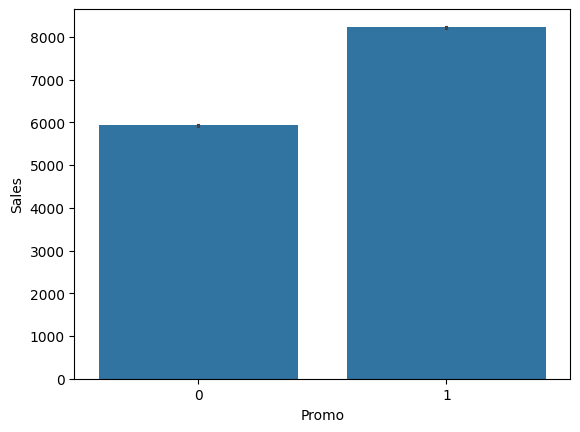

In [199]:
sns.barplot(data = df, x = 'Promo', y = 'Sales')

In [201]:
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [202]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

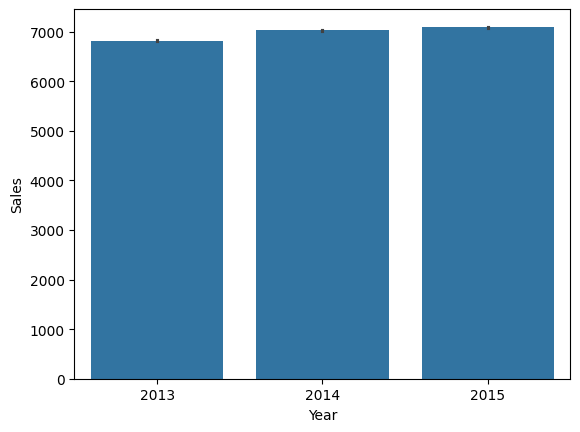

In [203]:
sns.barplot(data = df, x = 'Year', y = 'Sales')

<Axes: xlabel='Month', ylabel='Sales'>

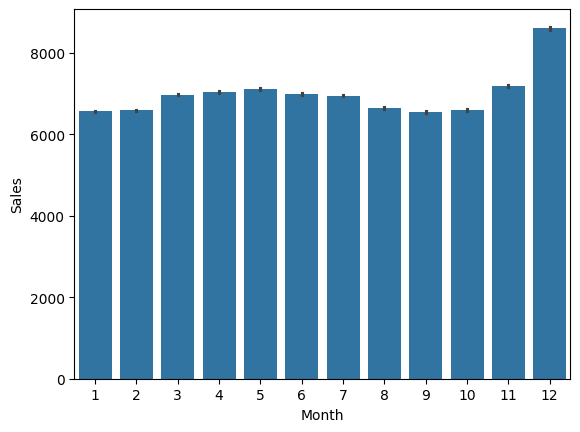

In [204]:
sns.barplot(data = df, x = 'Month', y = 'Sales')

#Train/Test/Validation Split

In [205]:
len(df)

844392

In [206]:
train_size = int(0.75*len(df))
train_size

633294

In [207]:
sorted_df = df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [208]:
len(train_df), len(val_df)

(633294, 211098)

In [209]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [210]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [211]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [212]:
val_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
256637,751,3,2014-12-10,3720,533,1,0,0,0,a,...,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014
256638,752,3,2014-12-10,4258,404,1,0,0,0,a,...,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014
256639,753,3,2014-12-10,7170,654,1,0,0,0,d,...,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014
256640,754,3,2014-12-10,7359,837,1,0,0,0,c,...,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014
256635,748,3,2014-12-10,4579,411,1,0,0,0,d,...,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,5,2015-07-31,8363,746,1,1,0,1,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015
745,746,5,2015-07-31,9082,638,1,1,0,1,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015
746,747,5,2015-07-31,10708,826,1,1,0,1,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015
740,741,5,2015-07-31,11253,1137,1,1,0,1,d,...,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015


In [213]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [214]:
# Input Target columns
input_col = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = ['Sales']

In [215]:
df[input_col].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       5
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [216]:
train_input = train_df[input_col].copy()
train_target = train_df[target_col].copy()

In [217]:
val_input = val_df[input_col].copy()
val_target = val_df[target_col].copy()

In [218]:
test_input = merged_test_df[input_col].copy()

In [219]:
numeric_col = ['Store', 'Day', 'Month', 'Year']
categorical_col = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [221]:
#Imputation Scaling
from sklearn.impute import SimpleImputer

In [222]:
imputer = SimpleImputer(strategy = 'mean').fit(train_input[numeric_col])

In [223]:
train_input[numeric_col] = imputer.transform(train_input[numeric_col])
val_input[numeric_col] = imputer.transform(val_input[numeric_col])
test_input[numeric_col] = imputer.transform(test_input[numeric_col])

In [224]:
from sklearn.preprocessing import MinMaxScaler

In [225]:
scaler = MinMaxScaler().fit(train_input[numeric_col])

In [226]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
val_input[numeric_col] = scaler.transform(val_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])

In [227]:
from sklearn.preprocessing import OneHotEncoder

In [228]:
train_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = train_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)
val_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = val_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)
test_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = test_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)


In [229]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_input[categorical_col])
encoded_cols = list(encoder.get_feature_names_out(categorical_col))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [230]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_col])
val_input[encoded_cols] = encoder.transform(val_input[categorical_col])
test_input[encoded_cols] = encoder.transform(test_input[categorical_col])

In [231]:
train_input

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [232]:
x_train = train_input[numeric_col + encoded_cols]
x_val = val_input[numeric_col + encoded_cols]
x_test = test_input[numeric_col + encoded_cols]

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
linreg = LinearRegression().fit(x_train, train_target)

In [235]:
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [236]:
linreg.coef_

array([[ 1.04781334e+02, -9.97982019e+01,  6.51172904e+02,
         1.05495132e+02, -8.84995136e+13, -8.84995136e+13,
        -8.84995136e+13, -8.84995136e+13, -8.84995136e+13,
        -8.84995136e+13, -8.84995136e+13, -1.62329335e+14,
        -1.62329335e+14, -2.05291188e+13, -2.05291188e+13,
        -2.05291188e+13, -2.05291188e+13, -1.54341191e+15,
        -1.54341191e+15, -1.54341191e+15, -1.54341191e+15,
        -1.86490234e+15, -1.86490234e+15, -1.86490234e+15]])

In [237]:
train_preds = linreg.predict(x_train)
train_preds

array([[ 7115. ],
       [10581. ],
       [ 7036. ],
       ...,
       [ 6243. ],
       [ 5999. ],
       [ 5618.5]])

In [238]:
from sklearn.metrics import mean_squared_error

In [239]:
mean_squared_error(train_preds, train_target, squared = False)

2741.5860353706703

In [240]:
val_preds = linreg.predict(x_val)

In [241]:
mean_squared_error(val_preds, val_target, squared = False)

2817.656190781348

In [242]:
len(x_train), len(train_target),len(x_val), len(val_target)

(633294, 633294, 211098, 211098)

In [243]:
def try_model(model):
  #fit model
  model.fit(x_train, train_target)

  #Prediction
  train_preds = model.predict(x_train)
  val_preds = model.predict(x_val)

  #RMSE
  train_rmse = mean_squared_error(train_target, train_preds, squared = False)
  val_rmse = mean_squared_error(val_target, val_preds, squared = False)

  return train_rmse, val_rmse

In [244]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [245]:
try_model(LinearRegression())

(2741.5860353706703, 2817.656190781348)

In [246]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [247]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [248]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [249]:
try_model(SGDRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(2742.7989485309913, 2826.398422265746)

In [250]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [251]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(0.0, 1559.7378600480247)

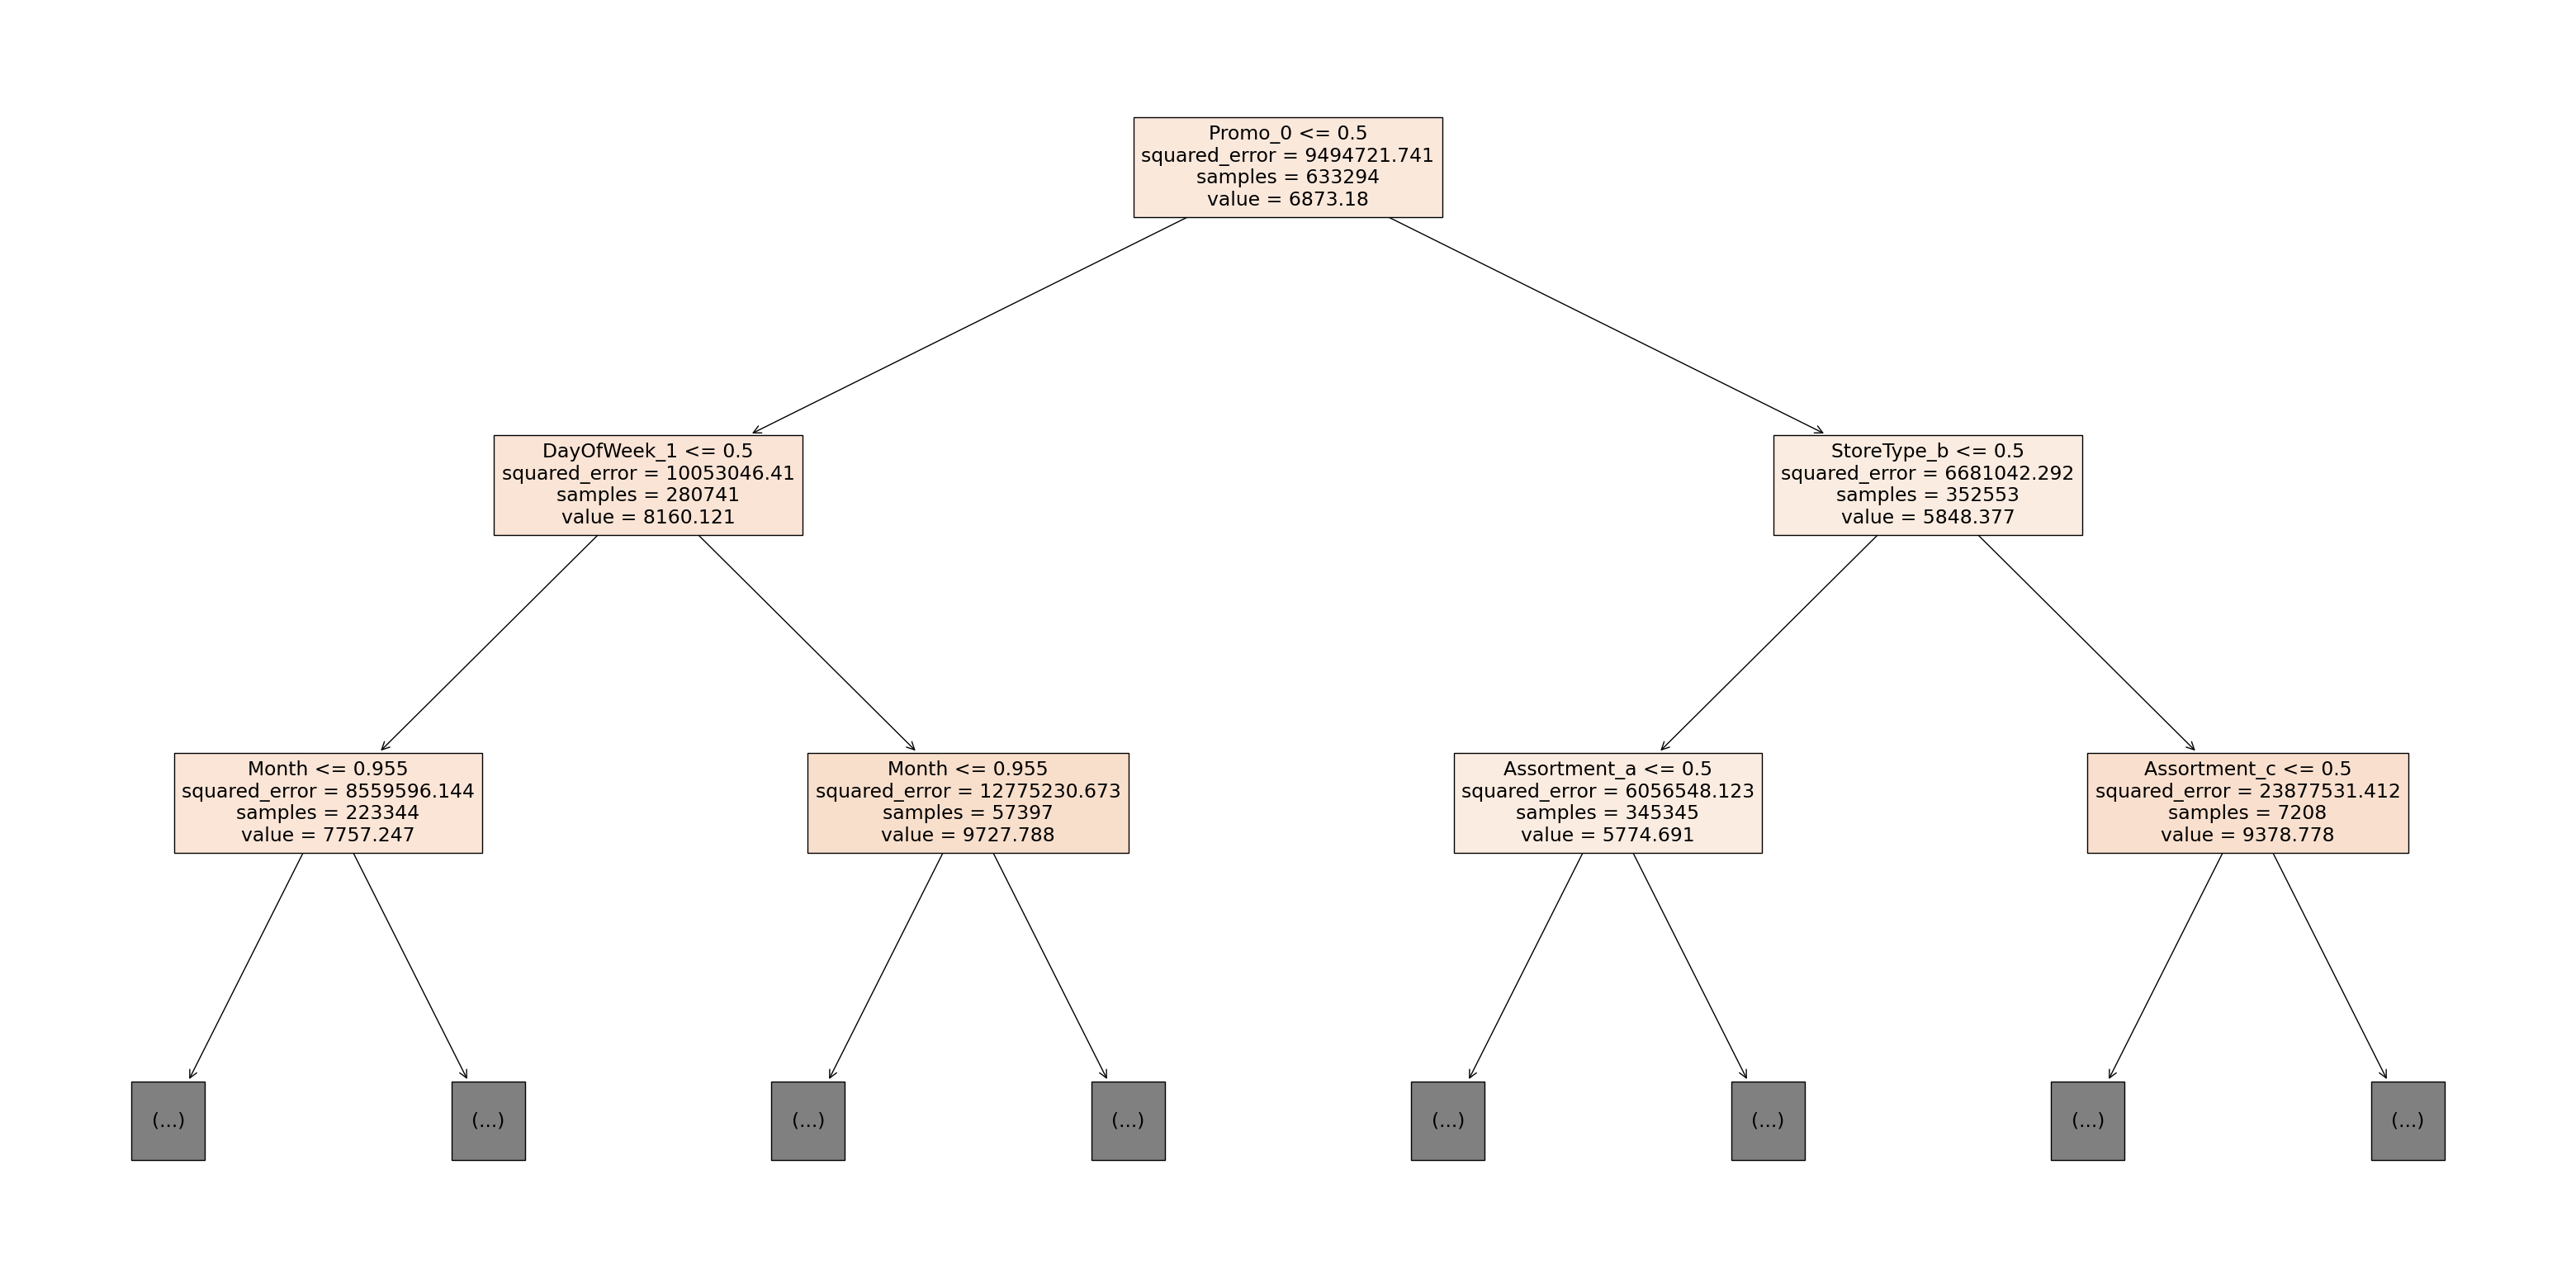

In [263]:
plt.figure(figsize = (40,20))
plot_tree(tree, max_depth = 2, filled = True, feature_names = numeric_col+encoded_cols);

In [253]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
forest = RandomForestRegressor(random_state = 42, n_jobs = -1, n_estimators=30) # n_estimators = 20
try_model(forest)

<ipython-input-243-474987f9b01d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, train_target)


(499.6673687178097, 1384.7659759883227)

In [255]:
x_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [256]:
forest.feature_importances_

array([6.07782156e-01, 4.89638039e-02, 4.71558247e-02, 9.29676778e-03,
       3.37754240e-02, 4.41415183e-03, 2.39185821e-03, 2.10581264e-03,
       5.69369601e-03, 6.75944077e-03, 4.55714060e-03, 6.93712041e-02,
       6.93698460e-02, 1.19275921e-03, 2.01460686e-04, 2.35356141e-05,
       2.03623002e-05, 1.38135419e-02, 2.26852346e-02, 1.02442237e-02,
       1.38073604e-02, 8.69807107e-03, 5.41311775e-03, 1.22632068e-02])

In [257]:
feature_importance_df = pd.DataFrame(
    {
        'feature':numeric_col + encoded_cols,
        'importance':forest.feature_importances_
    }
).sort_values('importance', ascending = False)

feature_importance_df

,feature,importance
0,Store,0.607782
11,Promo_0,0.069371
12,Promo_1,0.069370
1,Day,0.048964
2,Month,0.047156
4,DayOfWeek_1,0.033775
18,StoreType_b,0.022685
17,StoreType_a,0.013814
20,StoreType_d,0.013807
23,Assortment_c,0.012263


<Axes: xlabel='importance', ylabel='feature'>

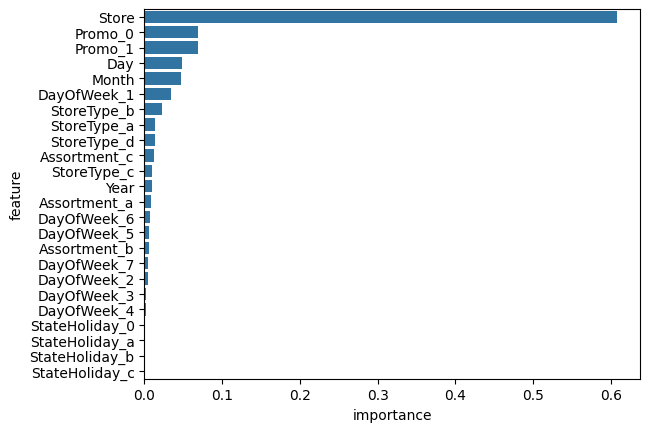

In [258]:
sns.barplot(data = feature_importance_df, x = 'importance', y = 'feature')

In [259]:
def predict_input(model, single_input):
  if single_input['Open'] == 0:
      return 0.
  input_df = pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = train_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)
  input_df[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = val_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)
  input_df[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']] = test_input[['DayOfWeek','Promo','StateHoliday', 'StoreType', 'Assortment']].astype(str)

  input_df[numeric_col] = imputer.transform(input_df[numeric_col])
  input_df[numeric_col] = scaler.transform(input_df[numeric_col])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_col])
  x_input = input_df[numeric_col + encoded_cols]
  pred = model.predict(x_input)[0]
  return pred


In [260]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

# Sample forcasting

In [261]:
predict_input(forest, sample_input)

4209.066666666667